# Discovering Exoplanets Around Distant Stars

By [Erin Hayes](https://www.ast.cam.ac.uk/people/Erin.Hayes), [Frances Rigby](https://www.ast.cam.ac.uk/people/frances.rigby), and [Richard Anslow](https://www.ast.cam.ac.uk/people/richard.anslow)

Humans have known about some of the planets in our own solar system for millenia, with the most recent discoveries of Uranus and Neptune coming in 1781 and 1846 respectively. The next big leap came over a hundred years later in 1995 when the first exoplanet, a planet around another star, was detected.

Since then over 5,000 exoplanets have since been confirmed. While some of these planets look like planets in own solar system, many of these planets are very different! They can be much bigger than Jupiter or much hotter than Mercury. It is the job of astronomers to use data such as the size and distance of the planet from its host star to figure out exactly how planets form and evolve over time to produce such a wide variety of solar systems. We've come a long way but there is still much more to uncover!

In this notebook, you will learn how astronomers use data from NASA's Kepler Space Telescope to discover exoplanets orbiting around other stars in our galaxy, the Milky Way!

## How to use this notebook:

Astronomers often work in "notebooks," which are workspaces for coding in python that make it very easy to do calculations and plot graphs quickly. Notebooks consists of many "cells" which help us organize our code. You can see the first cell of our notebook below this text.

In order to "run" a cell, you should press Shift + Enter together on your keyboard. Click on the cell below and try running it!

In [ ]:
# This is a cell!
# In python, we use a '#' symbol at the beginning of a line in a cell to leave "comments" that the computer doesn't read.
# Comments are helpful to organize our ideas when we're coding, or leave notes to help others understand our code.
# Feel free to add your own comments throughout the notebook!

Built-in to the computer are a number of "functions." Functions are short commands that make the computer automatically perform a task for us.

Functions are normally used by typing the name of the function followed by a set of parenthesis, which specify the object we want the function to focus on (this could be a number, a list of numbers, some text, etc). For example, the code `print('Hello World!')` tells the computer to show the phrase "Hello World" on your screen!

In [ ]:
# Can you get the computer to print the phrase "Exoplanets are awesome!" ?
print("Exoplanets are awesome!")

You should see the phrase you wanted to print shown above!

Let's try using another built-in python function. The "min" function will find the minimum of a list of numbers for us. First, we'll want to create a list of numbers. Then we'll want to use the `min()` function to find the minimum of our list of numbers. 

In [ ]:
# Create a list of numbers below. Feel free to change it!
numbers = [0.3, 1, 28, 17.6, 4, 0.05, 1.25]

# Use the min function below to find the minimum of our list, "numbers"
print('The minimum of our list of numbers is: ')
min(numbers)

If you are seeing the message `TypeError: min expected 1 arguments, got 0`, you may not have told the `min()` function what list to look at. Keep trying until you see the correct minimum of the list printed out above!

To learn more about the built-in python functions, you can check out the [Python documentation](https://docs.python.org/3/library/functions.html), which lists all the available functions.

### Imports

Basic python has some useful functions, but we're going to want more specialized functions for astronomy. Software engineers and astronomers have developed a number of "packages," which contain extra functions that are useful for specific purposes. For example, the `matplotlib` package helps to make graphs, such as scatter plots or bar charts, in python. Examples of what you can do with `matplotlib` can be found on the [package documentation website](https://matplotlib.org/stable/gallery/index.html). When you run the cell below, the computer will install and import the packages we need for this notebook.

The packages we're using are:
* `numpy`: a package with extended functionality for advanced mathematical computations
* `matplotlib`: a package for making plots and graphs
* `ipywidgets`: a package for turning static plots into interactive plots
* `astropy`: a package for keeping track of units and constants in astronomy, and opening files as data tables
* `lightkurve`: a package for accessing exoplanet data from the Kepler Telescope

In [ ]:
!git clone https://github.com/erinhay/outreach.git
!pip install ipympl
!pip install astropy
!pip install lightkurve > /dev/null 2>&1 

import os
os.chdir('/content/outreach/Discovering-Exoplanets/')

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import astropy.table as at
import astropy.units as au
import astropy.constants as ac
import lightkurve as lk

from google.colab import output
output.enable_custom_widget_manager()
%matplotlib widget

plt.style.use('./style/style.mplstyle')

## What is a light curve?

Light curves measure the brightness of a star over time, in a graph like this:

In [ ]:
# When we imported matplotlib, we gave it a nickname so we don't have to type out all of "matplotlib" all the time.
# Instead, to call functions from matplotlib, we can just use the prefix "plt"
# For example, to make a "figure," or the axes of our plot, we type "plt.figure()"

plt.figure(figsize=(10,4))      # This line tells the computer we want to make a "figure" or graph
                                # We've told matplotlib that we want our figure to be 10 units long and 4 units tall using figsize=(10,4)
plt.xlabel('time [days]')       # This line makes an x-axis label with the text "time [days]"
plt.ylabel('brightness')        # This line makes an y-axis label with the text "brightness"
plt.xlim(0, 10)                 # This line makes the x-axis go from 0 to 10 days
plt.ylim(0, 2)                  # This line makes the y-axis go from 0 to 2 units of brightness
plt.tight_layout()
plt.show()

### The Kepler telescope was sent into space to observe the light curves of millions of stars, some of which might have exoplanets orbiting them. What do you expect the light curve of a star without an exoplanet orbiting it to look like?

Below, you will open a file that has simulated data from a star without an exoplanet orbiting it. We will use the `read` function from astropy to put the file into a table. You can access this astropy funtion via `at.Table.read()`.

Can you print the data table? What do the columns in the data table mean?

In [ ]:
path_to_data = './data/star1.csv'          # The "path" tells us where the file is located on our computer. Don't worry about changing this!
data_table = at.Table.read(path_to_data)   # We will tell the function at.Table.read() to look in the location specified by path_to_data to open the file

# Print the table with the data!
print(data_table)

Now that we've opened the data table, can you plot the light curve?

In [ ]:
# Retrieve the times of observation and the observed brightnesses from the data table
times = data_table['time']          # Store the times of measurements here
brightness = data_table['flux']     # and the brightness (or flux) measurements here


# Open a figure and use the function plt.errorbar to plot the brightnesses as a scatter plot!
plt.figure(figsize=(10,4))

# With plt.errorbar, the first entry we give to the function should be the values
# we want to plot on the x-axis (time, in our case). The second entry should
# be the values we want to plot on the y-axis (brightness, in our case).
# There are some extra parameters we can use to make the plot look clear, such as marker='.'.
# You can find out more about the errorbar function here:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html.
# Give it a go!
plt.errorbar(times, brightness, ls='None', marker='.')

plt.xlabel('time [days]')
plt.ylabel('brightness')
plt.ylim(0,1.5)
plt.tight_layout()

What do you notice about this light curve? Is it as you expected?

### When an exoplanet passes in front of a star, the brightness of the star decreases because the exoplanet blocks the light. The light curve is left with a dip in it like you see in this video:

<br>
<img src="https://github.com/erinhay/outreach/blob/main/Discovering-Exoplanets/images/transit_gif.gif?raw=1" alt="Alternative text" />
<br>

By observing stars and looking for dips in their brightnesses, astronomers can identify which stars have exoplanets orbiting around them. Now that we know what we're looking for, let's look at the light curve of a simulated star that has an exoplanet orbiting it!

In [ ]:
path_to_data = './data/star2.csv'         # Again, don't worry about changing this!
data_table = at.Table.read(path_to_data)

In [ ]:
# As before, retrieve the times of observation and the observed brightnesses from the data table
times = data_table['time']          # Store the times of measurements here
brightness = data_table['flux']     # and the brightness (or flux) measurements here

# Set up the graph in the same way as before:
plt.figure(figsize=(10,4))

# Make a scatter plot of the brightnesses over time
plt.errorbar(times, brightness, ls='None', marker='.')

plt.xlabel('time [days]')
plt.ylabel('brightness')
plt.ylim(0.9992,1.0002)
plt.tight_layout()

We can see the exoplanet orbit with a regular spacing between transits!

### The shape of the transit can very a lot depending on a lot of factors, including the radius of the exoplanet and how fast the exoplanet moves around the star. There are a lot of other factors that affect the shape of the light curve, such as the size of the star and the distance of the exoplanet from the star.

Fortunately, we can use our knowledge of physics to relate properties of the exoplanet to the shape of the transit. Next, we want to define a model for the brightness of a star with an exoplanet. Then, when we have data, we can use our model to match the shape of the light curve in the data to determine properties of the exoplanet.

We want our model to be a function of 5 parameters:
* the orbital radius, $a$
* the radius of the exoplanet, $R_\text{p}$ [m]
* the mass of the exoplanet, $M_\text{p}$ [kg]
* the radius of the star, $R_\text{star}$ [m]
* the mass of the star, $M_\text{star}$ [kg]
* the inclination angle of the plane of the orbit of the exoplanet relative to the plane of the line between Earth and the host star, inclination [deg]

Below, we define our own function `model()` that will tell us the brightness of a star at some times based on the four parameters listed above. However, we still need to fill in the period of the exoplanet's orbit from it's orbital radius. Can you recall Kepler's Third Law? You'll need it below!

In [ ]:
def model(times, a = 1.496e11, R_p = 0, R_star = 6.96e8, M_star = 1.989e30, inclination = 45, offset=0):
    """
    Model for the brightness of a star with an exoplanet orbiting it as a function of time.
    This model has been adapted from Mandel & Agol 2002 & reparameterized to take 5 inputs:
        * period of exoplanet orbit, a [m]
        * radius of exoplanet, R_p [m]
        * radius of host star, R_star [m]
        * mass of the host star, M_star [kg]
        * the inclination angle of the plane of the orbit of the exoplanet relative to the
          plane of the line between Earth and the host star, inclination [deg]
    """

    # Here, we are making sure our inputs are in the right units
    # You don't need to change this!
    times = (times*au.d).to(au.second)
    offset = (offset*au.d).to(au.second)
    a = a * au.m
    R_p = R_p * au.m
    R_star = R_star * au.m
    M_star = M_star * au.kg

    # How can we get the period from the orbital radius, a?
    # Edit the model here!
    period = 2 * np.pi * np.sqrt(a**3 / (ac.G * M_star))

    # You don't need to change anything below this line!
    rate = 2*np.pi*a / period # m / s
    s = rate * (times-offset) #(m / s) * s = m
    d = a * (1 - np.cos(s.value / a.value)) # m

    p = R_p/R_star
    zs = d/R_star/np.cos(inclination * np.pi / 180)

    lamdba = np.zeros(len(zs))
    for i, z in enumerate(zs):
        if z > 1+p:
            lamdba[i] = 0
        elif z > np.abs(1-p) and z <= 1+p:
            k0 = np.arccos((p**2 + z**2 - 1)/(2*p*z))
            k1 = np.arccos((1 - p**2 + z**2)/(2*z))
            root = ((2*z)**2 - (1 + z**2 - p**2)**2) / 4
            lamdba[i] = ((k0.value * p.value**2) + k1.value - np.sqrt(root)) / np.pi
        elif z <= 1-p:
            lamdba[i] = p**2
        elif z <= p-1:
            lamdba[i] = 1
    
    brightness = np.ones(len(zs)) - lamdba
    return brightness

#### Now, let's see what our model can do!

In the next cell, you will be able to adjust the radius of the exoplanet, the distance of the exoplanet from the host star, and the radius and mass of the host star using sliders. You are also able to change where the transits fall in time using the "offset" slider. Play with the sliders to create unique transit events and answer the following questions:

1. What happens to the size of the transit dip if you make the radius of the exoplanet smaller?
2. If the exoplanet is placed further away from the star, what happens to the shape of the transit?
3. How does the inclination angle affect the shape of the transit?

Can you come up with reasons for why the light curve changes as a result of these changing characteristics of the exoplanet system?

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))

N_observations = 1000
model_times = np.linspace(0, 10, N_observations)

@interact(orbital_radius = (2e9, 9e9, 5e8), exoplanet_radius = (0, 1e8, 5e6),
          star_radius = (1e8, 9e8, 5e7), star_mass = (1e30, 1e31, 5e29),
          inclination = (0, 90, 5), offset = (0, 10, 0.5))

def plot(orbital_radius, exoplanet_radius, star_radius, star_mass, inclination, offset):
    model_brightness = model(model_times, a = orbital_radius, R_p = exoplanet_radius, R_star = star_radius,
                             M_star = star_mass, inclination = inclination, offset = offset)
    ax.clear()
    ax.plot(model_times, model_brightness)
    ax.set_ylim(0.985,1.005)
    ax.set_xlabel('time [days]')
    ax.set_ylabel('brightness')
    
plt.tight_layout()

### We can plot our light curve on top of data and adjust the different aspects of the light curve to figure out the size of the exoplanet, its distance from the star, and more!

Below, you will find the simulated data from above with the model plotted on top of it. Using the sliders, can you figure out the period of the exoplanet's orbit and the exoplanet's radius?

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))

N_observations = 1000
model_times = np.linspace(0, 10, N_observations)

@interact(orbital_radius = (2e9, 9e9, 5e8), exoplanet_radius = (5e6, 2e7, 1e6),
          star_radius = (1e8, 9e8, 5e7), star_mass = (1e30, 4e30, 2e29),
          inclination = (0, 90, 5), offset = (0, 10, 0.5))

def plot(orbital_radius, exoplanet_radius, star_radius, star_mass, inclination, offset):
    model_brightness = model(model_times, a = orbital_radius, R_p = exoplanet_radius, R_star = star_radius,
                             M_star = star_mass, inclination = inclination, offset = offset)
    ax.clear()
    ax.plot(model_times, model_brightness)
    ax.errorbar(times, brightness, ls='None', marker='.', color='black')
    ax.set_ylim(0.999, 1.0005)
    ax.set_xlabel('time [days]')
    ax.set_ylabel('brightness')
    
plt.tight_layout()

#### Great work! It's not an easy task, so don't worry if you don't get a perfect fit!

## Detecting Exoplanet Transits

Now that we know what to look for, we can look at **real** data from the Kepler telescope!

Kepler was a NASA space telescope designed to detect exoplanets orbiting other stars using the transit method described above. Before Kepler, scientists didn't know if Earth-like rocky planets were common or rare in the galaxy, or if most stars hosted planets at all. The overall aim of the mission was therefore to discover hundreds of new rocky planets, and more generally better understand the prevalence of different types of planets in our galaxy.
Specific mission goals included determining the percentage of terrestrial planets in the habital zone of different types of stars, characterizing their sizes, shapes, and orbits, and understanding the properties of stars hosting planetary systems.

Kepler launched in 2009. The primary mission consisted of continuous observation of a single field of about 160,000 stars. This allowed for well-measured, low-noise lightcurves so that small rocky planets could be detected despite the small dips they create. 
After four years of observation, two of Kepler's reaction wheels (that accurately pointed the spacecraft) failed by 2013. NASA scientists designed a new mission dubbed K2 to continue to do science despite these limitations. K2 continued until Kepler's retirement in 2018, observing additional planets as well as discovering 61 supernovae (stellar explosions).

Over its lifetime, Kepler observed over 500,000 stars and discovered nearly 3,000 confirmed exoplanets -- many more than the approximately 300 that were known before Kepler. This confirmed that planets are in fact common, with more planets than stars in our galaxy, and Earth-size worlds in particular are likely to orbit up to half the stars we see. After its retirement, Kepler has been succeeded by another NASA mission called TESS. Launched in 2018, TESS also uses transits to search for planets; it takes a complementary approach to *Kepler*, hunting for nearby exoplanets around brighter stars across the whole sky, and is currently in its extended mission.

<br>
<img src="https://github.com/erinhay/outreach/blob/main/Discovering-Exoplanets/images/kepler.jpeg?raw=1" alt="Alternative text" />
<br>

These experiments are made possible by large teams of scientists and engineers working in concert, including outstanding contributions by many women. This includes Kepler/K2 project scientists [Natalie Batalha](https://www.nasa.gov/mission_pages/kepler/team/batalha.html) and [Jessie Dotson](https://www.nasa.gov/mission_pages/kepler/team/jessie_dotson) and TESS project scientist [Patricia Boyd](https://science.gsfc.nasa.gov/sed/bio/patricia.t.boyd), who have/had lead science roles in these projects, as well as leading operations work by Kepler Mission Director/Operations Manager [Marcie Smith](https://www.nasa.gov/mission_pages/kepler/team/Marcie_Smith.html), and Project Manager [Maura Fujieh](https://www.nasa.gov/mission_pages/kepler/team/maura-fujieh).

-----

To look at *Kepler* data, astronomers have developed special tools. We're going to use some of those tools now to look at the light curve from a star called Kepler 1658. Let's see if we can find an exoplanet around this star!

In [ ]:
# First, we need to retrieve light curve data for Kepler-1658b
## This requires a couple of steps using special functions:
## 1. Download the file
Kepler1658_file = lk.search_targetpixelfile("Kepler-1658")[4].download()

## 2. Extract the time and brightness data and put it into a table called "light_curve_data"
light_curve_data = Kepler1658_file.to_lightcurve(method="sap").remove_outliers().flatten()
light_curve_data = light_curve_data['time', 'flux', 'flux_err']

## 3. Can you print the table?
print(light_curve_data)

In [ ]:
## 4. From the light_curve_data table, can you extract the time and brightness data?
Kepler_times = light_curve_data['time'].value        # times of measurements
Kepler_brightness = light_curve_data['flux'].value   # brightness measurements
Kepler_error = light_curve_data['flux_err'].value    # uncertainty on the brightness measurements

In [ ]:
# Can you plot the data to see what the light curve looks like?

fig, ax = plt.subplots(figsize=(10,4))
ax.errorbar(Kepler_times, Kepler_brightness, yerr=Kepler_error, ls='None', marker='.', color='black', ms=1, lw=0.5)
ax.set_ylim(0.998, 1.001)
ax.set_xlabel('time [days]')
ax.set_ylabel('brightness')

plt.tight_layout()

### Based on this light curve, do you think there's an exoplanet orbiting around this star? 

Can you zoom into a smaller region of the light curve to get a better look at it?

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
ax.errorbar(Kepler_times, Kepler_brightness, yerr=Kepler_error, ls='None', marker='.', color='black', ms=1, lw=0.5)
ax.set_xlim(133.75, 143)
ax.set_ylim(0.998, 1.001)
ax.set_xlabel('time [days]')
ax.set_ylabel('brightness')

plt.tight_layout()

### It's an exoplanet!

Let's use the sliders from before to see if we can determine the period and radius of Kepler 1685's exoplanet. We know that this star is about 3x the size of the sun, so we won't worry about adjusting that value.

In [ ]:
true_Rs = 2.891*6.96e8*au.m

fig, ax = plt.subplots(figsize=(10,4))

N_observations = 1000
model_times = np.linspace(133.75, 143, N_observations)

@interact(orbital_radius = (2e9, 9e9, 5e8), exoplanet_radius = (5e7, 1e8, 2e6),
          star_mass = (1e30, 4e30, 2e29), inclination = (0, 90, 5), offset = (0, 10, 1))

def plot(orbital_radius, exoplanet_radius, star_mass, inclination, offset):
    model_brightness = model(model_times, a = orbital_radius, R_p = exoplanet_radius,
                             R_star = true_Rs.value, M_star = star_mass,
                             inclination = inclination, offset = offset)
    ax.clear()
    ax.plot(model_times, model_brightness)
    ax.errorbar(Kepler_times, Kepler_brightness, yerr=Kepler_error, ls='None', marker='.', color='black', ms=1, lw=0.5)
    ax.set_xlim(133.75, 143)
    ax.set_ylim(0.998, 1.001)
    ax.set_xlabel('time [days]')
    ax.set_ylabel('brightness')
    
plt.tight_layout()

### Was that difficult to figure out? Don't worry -- it's nearly impossible to get the right answer on your own!

Because there are a lot of different things affecting the shape of the light curve, astronomers had to come up with easier ways to find the exoplanet characteristics from the light curve. We had to do some complicated maths and coding to get the answers, but fortunately we can now use the findings by running the following cells to find out the solutions!

In [89]:
true_inc = 76.52
print('The inclination angle is: ', true_inc)

true_Ms = 1.45*1.989e30*au.kg
print('The mass of the star is: ', true_Ms)

true_Rp = 1.07*7.149e7*au.m
print('The radius of the exoplanet is: ', true_Rp)

# Extract the period of the light curve:
true_period = light_curve_data.to_periodogram("bls").period_at_max_power

# Stack each orbit on top of each other:
folded_light_curve_data = light_curve_data.fold(2*true_period)

time_data = folded_light_curve_data.time.value
brightness_data = folded_light_curve_data.flux.value
time_data = time_data - np.min(time_data)

print('The period of the light curve is: ', true_period)

The mass of the star is:  76494300.0 kg
The radius of the exoplanet is:  76494300.0 m
The period of the light curve is:  3.849450437077787 d


Now that we know what the true period is, What does that mean the true orbital radius is?

In [38]:
true_a = ((true_period.to(au.second)**2 * ac.G * true_Ms ) / (4 * np.pi**2) )**(1/3)

print('The orbital radius of the exoplanet is: ', true_a)

The orbital radius of the exoplanet is:  7309679571.789415 m


### Let's plot the solution on top of one transit to see if it looks right!

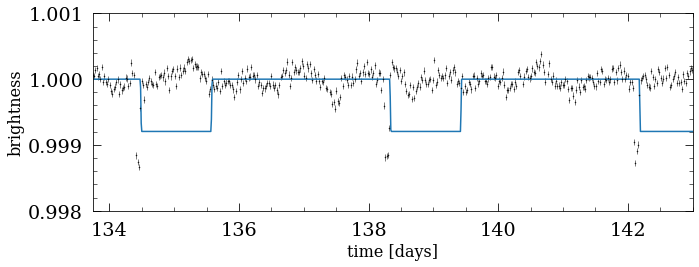

In [41]:
fig, ax = plt.subplots(figsize=(10,4))

N_observations = 1000
model_times = np.linspace(133.75, 143, N_observations)

model_brightness = model(model_times, a = true_a.value, R_p = true_Rp.value,
                         R_star = true_Rs.value, M_star = true_Ms.value,
                         inclination = true_inc, offset = 3.55)

ax.errorbar(Kepler_times, Kepler_brightness, yerr=Kepler_error, ls='None', marker='.', color='black', ms=1, lw=0.5)
ax.plot(model_times, model_brightness)
ax.set_xlim(133.75, 143)
ax.set_ylim(0.998, 1.001)
ax.set_xlabel('time [days]')
ax.set_ylabel('brightness')
    
plt.tight_layout()

### Congratulations on discovering your first exoplanet!

Kepler 1658-b was first discovered in 2019 by a team of astronomers led by [Ashley Chontos](https://ashleyin.space/), a researcher at Princeton University in the USA. It took the Kepler team led by Chontos 10 years to confirm that this was a real exoplanet! Now that you are familiar with how many factors affect the system, you can appreciate why!

The fit to the data looks great, but it may not be perfect. Are there any other factors that we haven't taken into account in our model that might affect how well the model fits the data?

## Types of Exoplanets

Not all planets look alike! Depending on factors like the radius of the exoplanet and how fast it is moving around its host star (aka its period), planets can have very different properties.

Think about our own solar system:

<br>
<img src="https://github.com/erinhay/outreach/blob/main/Discovering-Exoplanets/images/solar_system.png?raw=1" alt="Alternative text"/>
<br>

Mercury, Venus, Earth, and Mars are relatively small rocky planets. Jupiter, Saturn, Neptune, and Uranus are much larger, cool gaseous planets. 

Just like there are different types of planets in our solar system, there are lots of different types of exoplanets. These types can be divided up by their radius and their period, as you can see in the graph below. For example, an exoplanet with a very large radius, more than 8-10x the radius of the Earth, and a very short period, less than 10 days, is called a "Hot Jupiter." This name comes from the fact that the planets are as big as Jupiter, but are much closer to the host star, which makes them much hotter than Jupiter.

Using the graph below, what are the other types of exoplanets? What do you think their names, sizes, and periods say about the characteristics of the exoplanets?

<br>
<img src="https://github.com/erinhay/outreach/blob/main/Discovering-Exoplanets/images/types_of_exoplanets.jpeg?raw=1" alt="Alternative text"/>
<br>

Can you find which class of planets Jupiter belongs to? It is about 11x the size of Earth and has a period of about 4,000 days!

Because of their different radii and periods, the different types of exoplanets have different looking light curves. Run the cell below to see the differences in the shape of the light curve dip depending on the type of exoplanet!

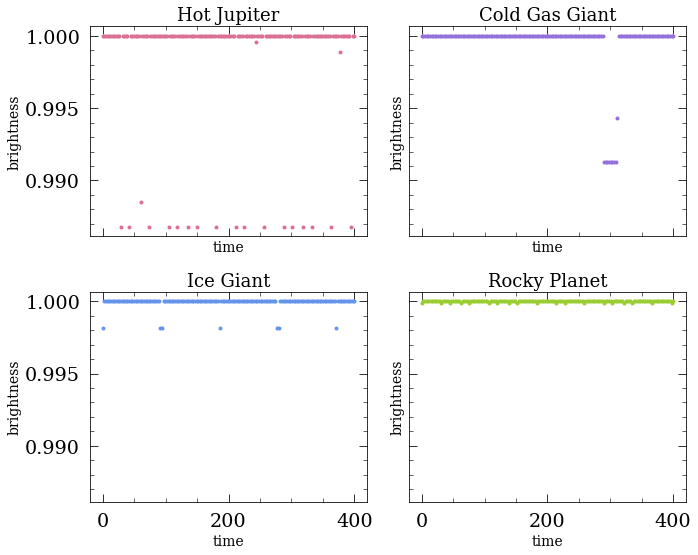

In [88]:
fig, ax = plt.subplots(2,2, figsize = (10,8), sharex=True, sharey=True)

titles = [['Hot Jupiter', 'Cold Gas Giant'], ['Ice Giant', 'Rocky Planet']]
colors = [['palevioletred', 'mediumpurple'], ['cornflowerblue', 'yellowgreen']]
exoplanet_radii = [[8e7, 6.5e7], [3e7, 8e6]]
orbital_radius = [[1e10, 3e11], [6e10, 1e10]]
offset = [[10, 300], [0, 0]]

N_observations = 154
times = np.linspace(0, 400, N_observations)

for i, title_pair in enumerate(titles):
    for j, title in enumerate(title_pair):
        
        brightness = model(times, a = orbital_radius[i][j], R_p = exoplanet_radii[i][j], offset=offset[i][j])
        
        ax[i,j].errorbar(times, brightness, ls='None', marker='.', color=colors[i][j])
        ax[i,j].set_xlabel('time', fontsize=14)
        ax[i,j].set_ylabel('brightness', fontsize=14)
        ax[i,j].set_title(title, fontsize=18)
        
plt.tight_layout()

What do you notice about the above light curves? Is there anything that two or more of the light curves have in common? Is there anythink unique about one of the light curves? Which types of exoplanets do you think would be the easiest to detect? Which do you think would be the hardest to detect?

# Thank you for exploring the world of exoplanets with us today!

If you have any last questions, feel free to ask any helper in a purple shirt!

## Sources
* https://www.nytimes.com/2018/10/30/science/nasa-kepler-exoplanet.html
* https://www.nasa.gov/mission_pages/kepler/team/index.html
* https://www.nasa.gov/mission_pages/kepler/overview/index.html
* https://www.nasa.gov/kepler/topscience
* https://science.gsfc.nasa.gov/sed/bio/patricia.t.boyd
* https://www.nasa.gov/mission_pages/kepler/team/batalha.html
* https://www.nytimes.com/2018/03/26/science/tess-nasa-exoplanets.html
* https://www.nasa.gov/content/about-tess

## NYT Interactive graphic of Kepler planets:
https://archive.nytimes.com/www.nytimes.com/interactive/science/space/keplers-tally-of-planets.html